<a href="https://colab.research.google.com/github/MingyuKIM615/ITWILL_PYTHON/blob/master/ml06_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중 선형 회귀

특성(독립 변수)들이 여러개인 선형 회귀 모델
* 1차항만 고려한 선형 회귀
* 고차항들을 추가한 다항 선형 회귀

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 셋 준비

In [ ]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
perch = fish[fish['Species'] == 'Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
X = perch.iloc[:, 2:].values #> 2차원 배열
y = perch['Weight'].values   #> 1차원 배열

In [ ]:
X[:5, :]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [ ]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련 셋, 테스트 셋 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape

((42, 4), (14, 4))

In [ ]:
y_train.shape, y_test.shape

((42,), (14,))

In [ ]:
X_train[:5, :]

array([[19.6   , 20.8   ,  5.1376,  3.0368],
       [22.    , 23.5   ,  5.875 ,  3.525 ],
       [18.7   , 19.4   ,  5.1992,  3.1234],
       [17.4   , 18.5   ,  4.588 ,  2.9415],
       [36.    , 38.3   , 10.6091,  6.7408]])

In [ ]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

# 1차항만 고려하는 선형 회귀

$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4
=w_0 + X \cdot w
$$

In [ ]:
lin_reg = LinearRegression() # 선형 회귀 모델을 생성

In [ ]:
lin_reg.fit(X_train, y_train) # 훈련 셋과 훈련 레이블로 모델을 학습시킴

LinearRegression()

In [ ]:
# 선형 회귀의 훈련 결과 -> 절편, 계수들을 찾음.
print(lin_reg.intercept_) #> 숫자 1개
print(lin_reg.coef_)      #> 숫자 4개를 갖는 1차원 배열 

-610.0275364260515
[-40.18338554  47.80681727  67.34086612  35.34904264]


In [ ]:
# 훈련 셋의 예측값
train_pred = lin_reg.predict(X_train)
print(train_pred)

[  50.07831254  149.63115115   26.52323981  -11.85322276  727.07849472
  216.11818851  859.35210445  894.24144157  883.76216601  133.80604761
   30.46174313  165.45625469  267.36647321  302.42993565  942.06583292
  859.73196835  209.15316045  137.18128947  294.64533152  907.16858502
  585.54863062  292.8893912   763.11655759 -149.53132283  163.94525857
 -104.38889956  718.95576629  815.95759166  350.34538816  195.07245372
  764.17125484  130.77848264  116.61555757  142.50754589  959.21205119
  218.69399647   79.52715018  737.86169572  161.30274218  243.72987423
  939.22223984  665.0680958 ]


In [ ]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
# 훈련 셋의 평가 점수 - 훈련이 끝난 모델의 score 함수를 사용
lin_reg.score(X_train, y_train) #> R^2 score

0.9567246116638569

In [ ]:
# 훈련 셋 평가 - metrics 모듈의 함수들 사용
print('R^2:', r2_score(y_train, train_pred))
print('MSE:', mean_squared_error(y_train, train_pred))


R^2: 0.9567246116638569
MSE: 5340.176566753986


In [ ]:
np.sqrt(mean_squared_error(y_train, train_pred)) # RMSE

73.07651173088372

In [ ]:
# 테스트 셋 예측값
test_pred = lin_reg.predict(X_test)
print(test_pred)

[-334.87262176   53.65873458  318.38723843  178.88939119  155.66294578
  798.63147263  376.67891479  254.68982136  816.85546798  134.75524994
  977.68496847  -36.44039106  345.60505048  407.09835927]


In [ ]:
print(y_test) # 테스트 셋 실젯값

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [ ]:
# 테스트 셋에서의 R^2 score
lin_reg.score(X_test, y_test)

0.8790465615990273

In [ ]:
r2_score(y_test, test_pred)

0.8790465615990273

In [ ]:
np.sqrt(mean_squared_error(y_test, test_pred)) # RMSE

110.183531090199

# 2차항까지 추가한 선형 회귀

$$
\hat{y} = w_0 + w_1x_1 + ... +w_4x_4 + w_5x_1^2 + w_6x_1x_2+w_7x_1x_3+...
$$

In [ ]:
poly = PolynomialFeatures(include_bias=False)
scaler= StandardScaler()
reg = LinearRegression()

In [ ]:
# 변환기와 예측기를 연결한 머신 러닝 모델 생성
model = Pipeline([('poly',poly),
                  ('scaler', scaler),
                  ('reg', reg)])

In [ ]:
# 모델 훈련: 
# (1) 다차항 추가 --> (2) 각 특성들의 평균, 표준편차를 찾고  스케일 변환 --> (3) 변환된 데이터로 훈련
# (1) poly.fit_transform() --> (2) scaler.fit_transform() --> reg.fit()
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
# 선형 회귀 모델 훈련 결과  -- 선형 회귀식 절편
model.named_steps['reg'].intercept_

400.833333333325

In [ ]:
# 선형 회귀 모델 훈련 결과  -- 선형 회귀식 계수들
model.named_steps['reg'].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.9755853 , -210083.78541694,
        -49872.08633924,   29100.85132271,   91656.1835252 ,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [ ]:
model.named_steps['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [ ]:
# 훈련 셋 예측값
#> (1) 훈련 셋 다차항 추가 --> (2) 모든 특성들 스케일 변환 --> (3) 선형 회귀 모델에서 predict()
#> (1) poly.transform() --> (2) scaler.transform() -->  (3) reg.predict()
train_pred = model.predict(X_train)
print(train_pred)

[  86.22462498  117.8371985    65.36623277   51.32036181  688.61814191
  166.09437243  880.6739519   900.30918145  991.55155076  111.61287566
  111.82615306  126.79630184  203.74163857  256.18282041 1018.52857265
  889.87606203  151.71744742  128.8552342   262.18048814  958.88194506
  509.75756107  209.09874055  732.73599683   63.71933794  126.00056859
   43.36490993  648.48671444  818.10553377  311.20892879  143.06230598
  721.921373     96.56262516  125.94007862  142.94478702 1050.25814685
  158.62005849   60.19799201  683.20753036  139.33275961  226.26744371
 1060.55561024  595.45584151]


In [ ]:
print(y_train)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [ ]:
# 훈련 셋 평가 점수
print('R^2:', r2_score(y_train, train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, train_pred)))

R^2: 0.9920055538341159
RMSE: 31.408812188339144


In [ ]:
test_pred = model.predict(X_test)
print(test_pred)

[  23.11093892   16.86703258  283.14558245  126.83444969  121.43654058
  735.72232422  321.38687695  167.93520462  934.45200382   93.33407336
 1221.49026679   20.19532502  247.09413925  243.72607029]


In [ ]:
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
# 테스트 셋 평가 점수
print('R^2:', r2_score(y_test, test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_pred)))

R^2: 0.9492609601552854
RMSE: 71.36392024373914


# 고차항에 추가에 따른 $R^2$ score

1차항, 2차항, 3차항, 4차항, 5차항, 50차항 선형 회귀 모델 훈련시키고, 훈련 셋과 테스트 셋에서의 $R^2$score를 계산하고 시각화.

In [ ]:
degrees = [1, 2, 3, 4, 5, 50]
train_r2 = [] # 훈련 셋에서의 R^2 score를 저장할 리스트
test_r2 = [] # 테스트 셋에서의 R^2 score를 저장할 리스트

for d in degrees:
  poly = PolynomialFeatures(degree=d, include_bias=False)
  scaler = StandardScaler()
  lin_reg = LinearRegression()

  model = Pipeline([('poly', poly),
                    ('scaler', scaler),
                    ('lin_reg', lin_reg)])
  
  model.fit(X_train, y_train)
  train_r2.append(model.score(X_train, y_train))
  test_r2.append(model.score(X_test, y_test))
print(train_r2)
print(test_r2)

[0.9567246116638569, 0.9920055538341159, 0.9996812270801989, 1.0, 1.0, 1.0]
[0.8790465615990285, 0.9492609601552854, 0.8523515399224377, -100.10024499914411, -140.46766616560245, -31822945.973648466]


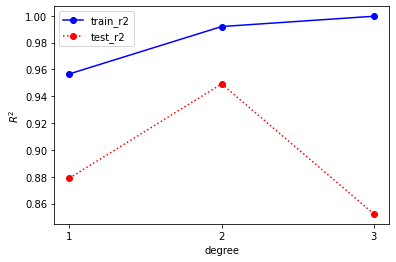

In [ ]:
plt.plot(train_r2[:3], 'bo-',label='train_r2')
plt.plot(test_r2[:3], 'ro:',label='test_r2')

plt.xticks(ticks=[0, 1, 2],labels=[1,2, 3])
plt.xlabel('degree')
plt.ylabel('$R^2$')
plt.legend()
plt.show()